# Modeling and Analysis
#### By: James Solomon
#### Date: September 26th, 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression
from scipy import stats
import statsmodels.api as sm

#Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Principle Componant Analysis
from sklearn.decomposition import PCA

# General Tools
from sklearn.model_selection import train_test_split


C:\Users\jamie\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\jamie\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


### The data is initially read in from the exported csv file saved in the EDA notebook.

In [2]:
df = pd.read_csv('HourlyDf_ModelReady_Raw')
df.head()

,DateTime_Stamp,Mean_Price,12_Hours_Ahead,6_Hour_Max,6_Hour_Min,12_Hour_Max,12_Hour_Min,1_Day_Max,1_Day_Min,7_Day_Max,...,360_Day_Max,360_Day_Min,500_Day_Max,500_Day_Min,700_Day_Max,700_Day_Min,1000_Day_Max,1000_Day_Min,2000_Day_Max,2000_Day_Min
0,2006-06-25 03:00:00,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.125985,...,1.247321,1.094631,1.272031,1.094631,1.337016,1.337016,1.398977,1.094631,1.61823,1.094631
1,2006-06-25 04:00:00,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.125985,...,1.247321,1.094631,1.272031,1.094631,1.337016,1.337016,1.398977,1.094631,1.61823,1.094631
2,2006-06-25 05:00:00,1.123279,1.119971,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.125985,...,1.247321,1.094631,1.272031,1.094631,1.337016,1.337016,1.398977,1.094631,1.61823,1.094631
3,2006-06-25 06:00:00,1.123279,1.121971,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.125985,...,1.247321,1.094631,1.272031,1.094631,1.337016,1.337016,1.398977,1.094631,1.61823,1.094631
4,2006-06-25 07:00:00,1.123279,1.122102,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.125985,...,1.247321,1.094631,1.272031,1.094631,1.337016,1.337016,1.398977,1.094631,1.61823,1.094631


### The data types are checked, and it seems the only column in the wrong format is the `DateTime_Stamp` column. As shown, this is casted as a DateTime.

In [3]:
df.dtypes

DateTime_Stamp     object
Mean_Price        float64
12_Hours_Ahead    float64
6_Hour_Max        float64
6_Hour_Min        float64
12_Hour_Max       float64
12_Hour_Min       float64
1_Day_Max         float64
1_Day_Min         float64
7_Day_Max         float64
7_Day_Min         float64
14_Day_Max        float64
14_Day_Min        float64
30_Day_Max        float64
30_Day_Min        float64
90_Day_Max        float64
90_Day_Min        float64
180_Day_Max       float64
180_Day_Min       float64
360_Day_Max       float64
360_Day_Min       float64
500_Day_Max       float64
500_Day_Min       float64
700_Day_Max       float64
700_Day_Min       float64
1000_Day_Max      float64
1000_Day_Min      float64
2000_Day_Max      float64
2000_Day_Min      float64
dtype: object

In [4]:
df['DateTime_Stamp'] = pd.to_datetime(df['DateTime_Stamp'])
df.dtypes

DateTime_Stamp    datetime64[ns]
Mean_Price               float64
12_Hours_Ahead           float64
6_Hour_Max               float64
6_Hour_Min               float64
12_Hour_Max              float64
12_Hour_Min              float64
1_Day_Max                float64
1_Day_Min                float64
7_Day_Max                float64
7_Day_Min                float64
14_Day_Max               float64
14_Day_Min               float64
30_Day_Max               float64
30_Day_Min               float64
90_Day_Max               float64
90_Day_Min               float64
180_Day_Max              float64
180_Day_Min              float64
360_Day_Max              float64
360_Day_Min              float64
500_Day_Max              float64
500_Day_Min              float64
700_Day_Max              float64
700_Day_Min              float64
1000_Day_Max             float64
1000_Day_Min             float64
2000_Day_Max             float64
2000_Day_Min             float64
dtype: object

### Next, the `DateTime_Stamp` column is set as the index.

In [5]:
df = df.set_index('DateTime_Stamp')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136034 entries, 2006-06-25 03:00:00 to 2021-12-31 04:00:00
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Mean_Price      136034 non-null  float64
 1   12_Hours_Ahead  136034 non-null  float64
 2   6_Hour_Max      136034 non-null  float64
 3   6_Hour_Min      136034 non-null  float64
 4   12_Hour_Max     136034 non-null  float64
 5   12_Hour_Min     136034 non-null  float64
 6   1_Day_Max       136034 non-null  float64
 7   1_Day_Min       136034 non-null  float64
 8   7_Day_Max       136034 non-null  float64
 9   7_Day_Min       136034 non-null  float64
 10  14_Day_Max      136034 non-null  float64
 11  14_Day_Min      136034 non-null  float64
 12  30_Day_Max      136034 non-null  float64
 13  30_Day_Min      136034 non-null  float64
 14  90_Day_Max      136034 non-null  float64
 15  90_Day_Min      136034 non-null  float64
 16  180_Day_Max     136034

### As shown, there are no nulls in the dataframe

In [7]:
df.isna().sum().sum()

0

### A `head()` function is called as a sanity check, and now the modeling may begin.

In [8]:
df.head()

,Mean_Price,12_Hours_Ahead,6_Hour_Max,6_Hour_Min,12_Hour_Max,12_Hour_Min,1_Day_Max,1_Day_Min,7_Day_Max,7_Day_Min,...,360_Day_Max,360_Day_Min,500_Day_Max,500_Day_Min,700_Day_Max,700_Day_Min,1000_Day_Max,1000_Day_Min,2000_Day_Max,2000_Day_Min
DateTime_Stamp,,,,,,,,,,,,,,,,,,,,,
2006-06-25 03:00:00,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.125985,1.105191,...,1.247321,1.094631,1.272031,1.094631,1.337016,1.337016,1.398977,1.094631,1.61823,1.094631
2006-06-25 04:00:00,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.125985,1.105191,...,1.247321,1.094631,1.272031,1.094631,1.337016,1.337016,1.398977,1.094631,1.61823,1.094631
2006-06-25 05:00:00,1.123279,1.119971,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.125985,1.105191,...,1.247321,1.094631,1.272031,1.094631,1.337016,1.337016,1.398977,1.094631,1.61823,1.094631
2006-06-25 06:00:00,1.123279,1.121971,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.125985,1.105191,...,1.247321,1.094631,1.272031,1.094631,1.337016,1.337016,1.398977,1.094631,1.61823,1.094631
2006-06-25 07:00:00,1.123279,1.122102,1.123279,1.123279,1.123279,1.123279,1.123279,1.123279,1.125985,1.105191,...,1.247321,1.094631,1.272031,1.094631,1.337016,1.337016,1.398977,1.094631,1.61823,1.094631


# Modeling

### First the data is split up into train, validate, and test sets. This is to prevent data leakage during the hyper perameter optimization process.

In [9]:
X = df.drop('12_Hours_Ahead', axis=1)
y = df['12_Hours_Ahead']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, 
                                                    test_size=0.2)

### Now the X columns are plotted against the y column to visualize the main patterns. 
 * As expected, the larger the timeframe becomes, the less correlated they seem to be.
 * However, even though the correlation becomes more sparse, there still seems to be one present in every plot.

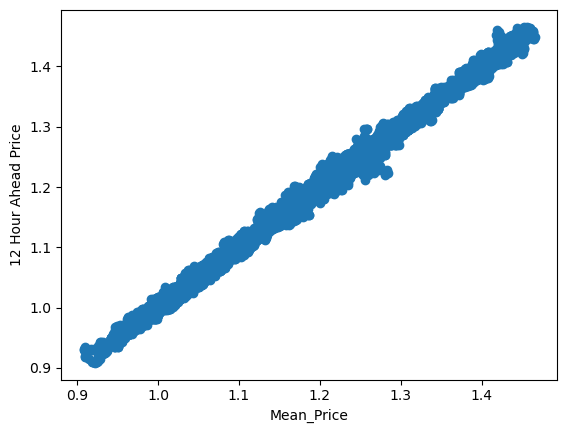

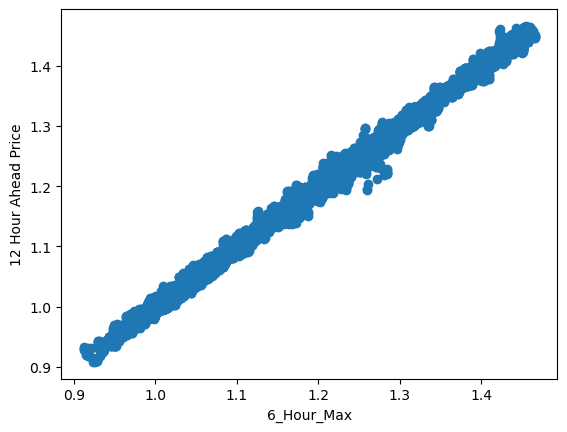

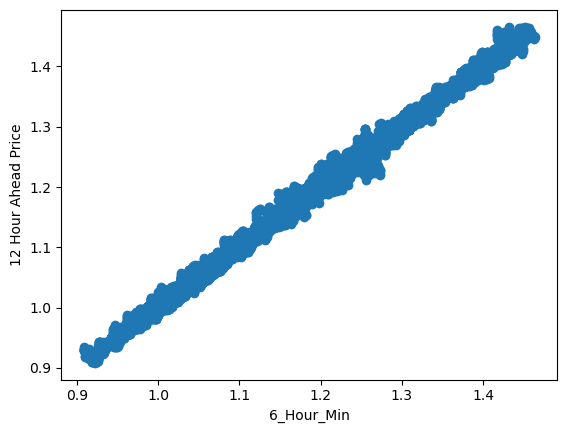

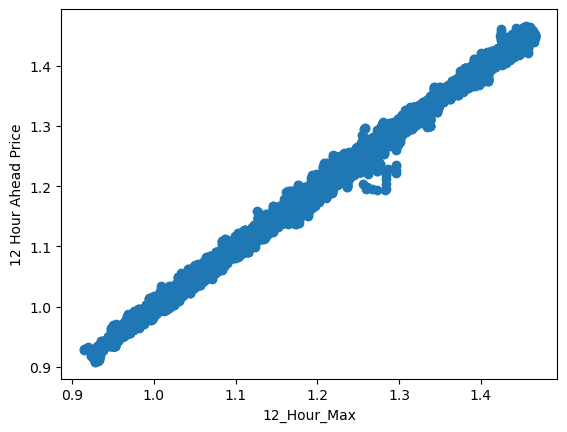

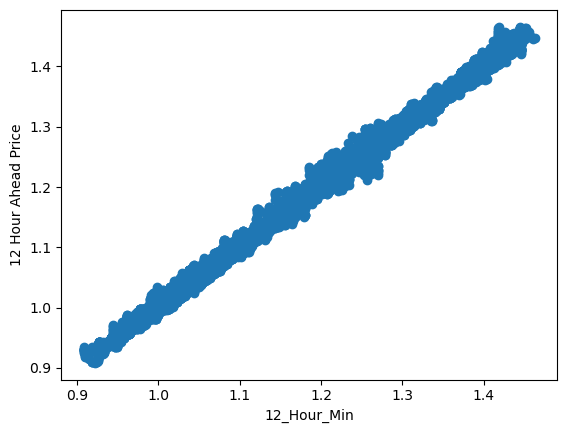

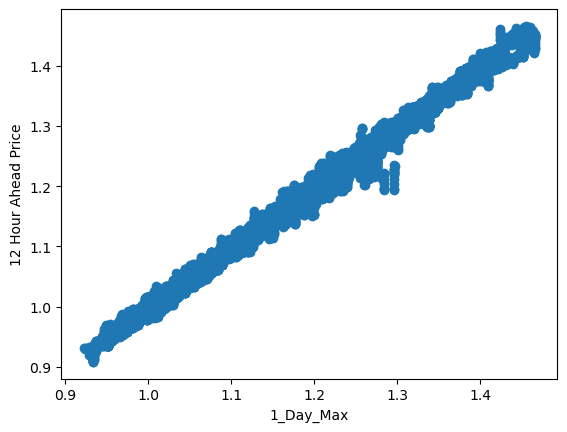

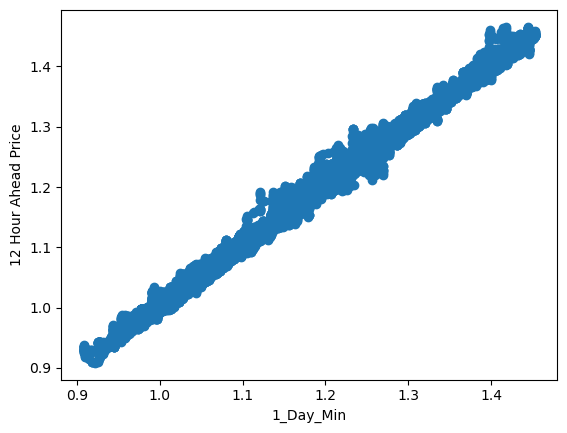

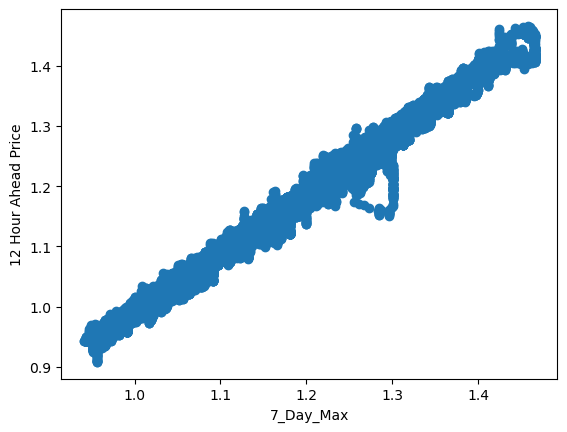

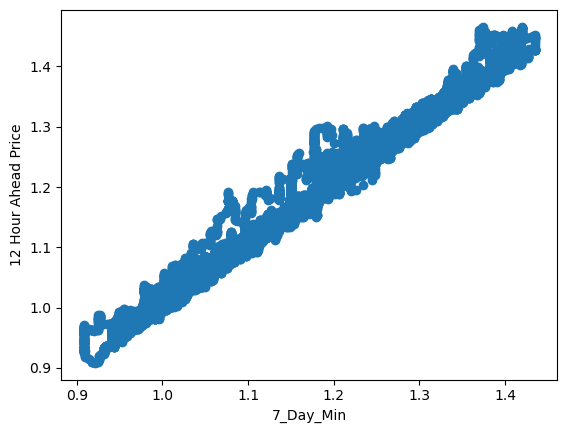

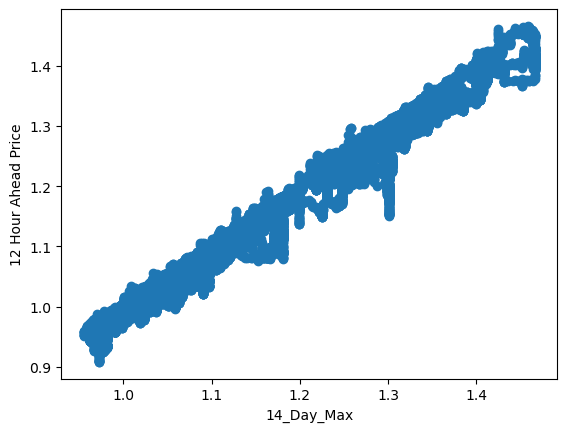

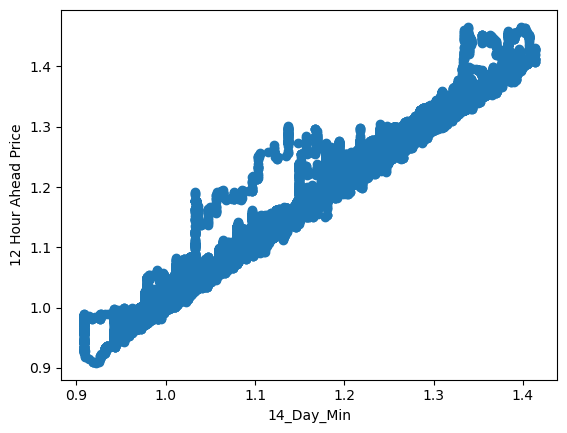

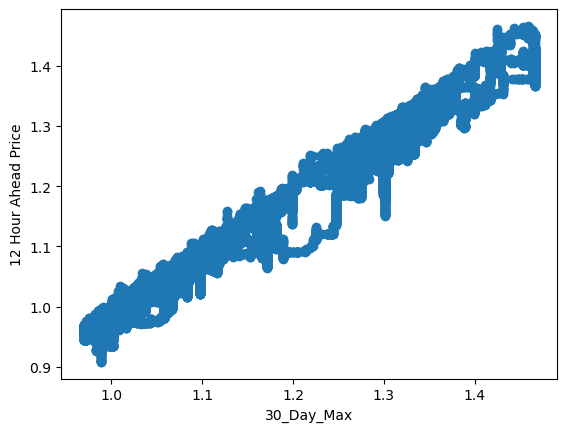

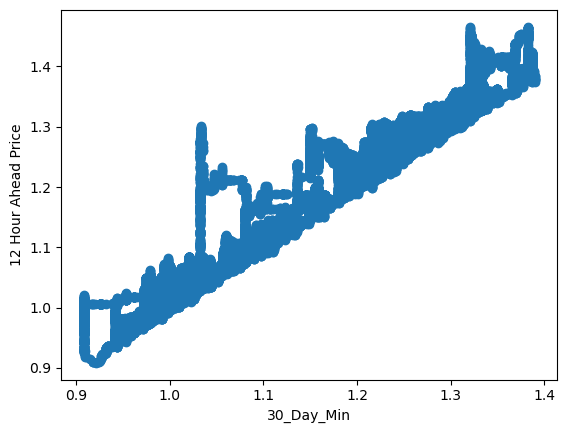

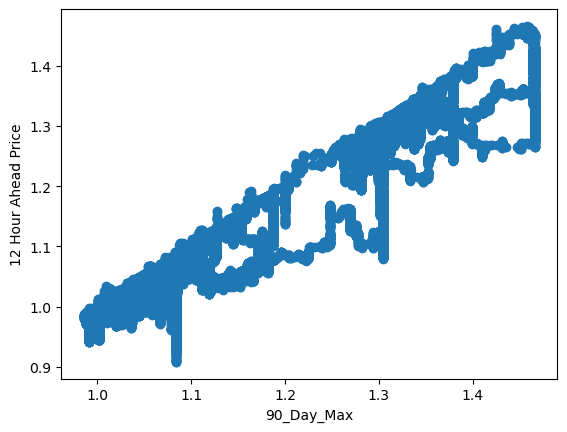

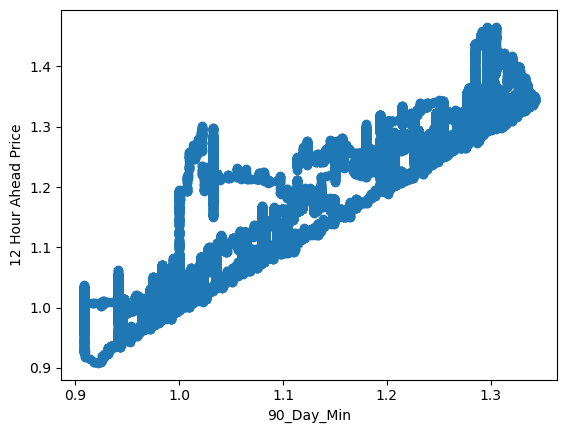

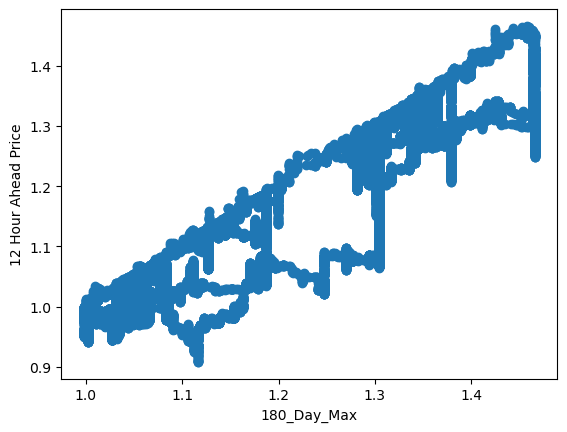

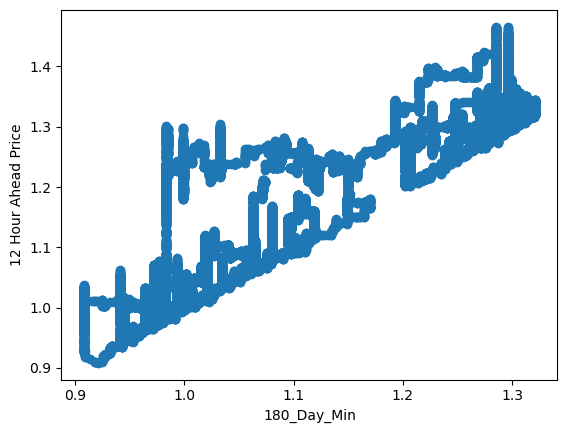

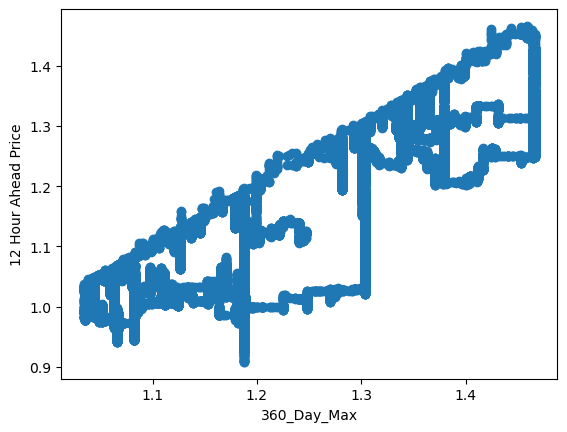

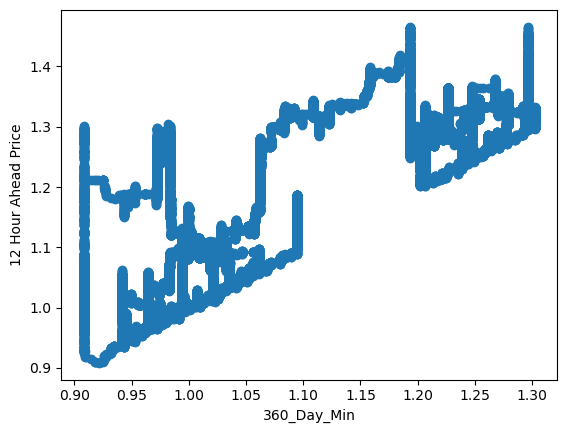

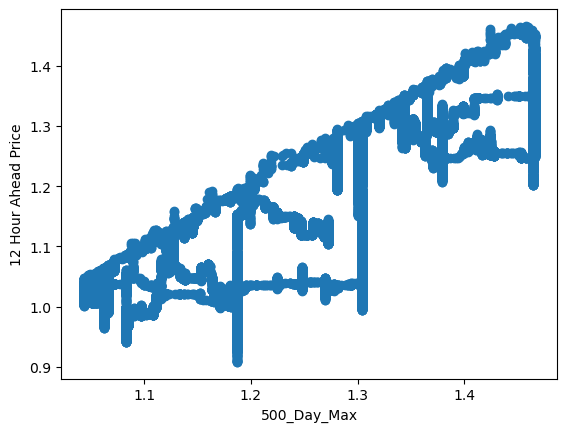

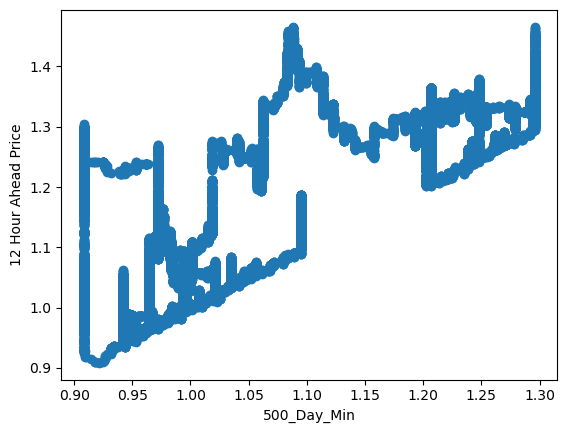

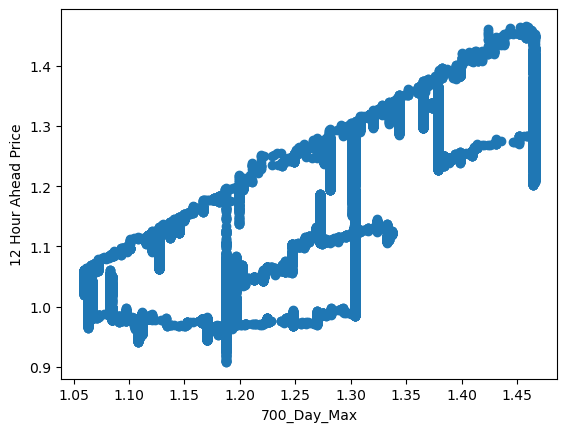

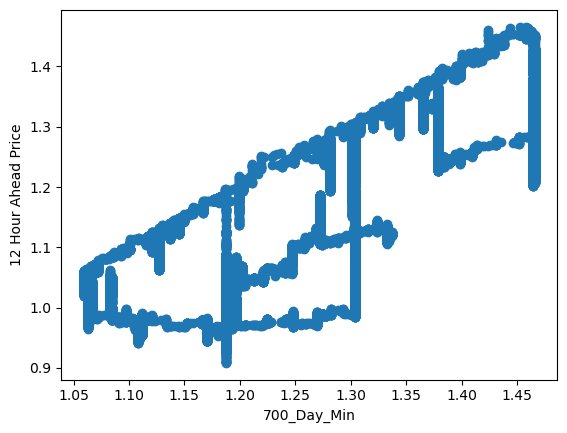

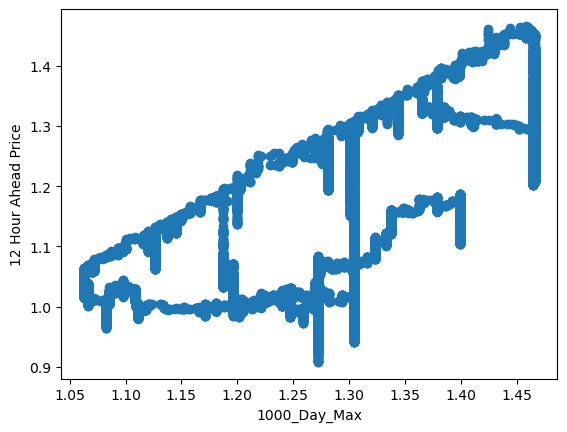

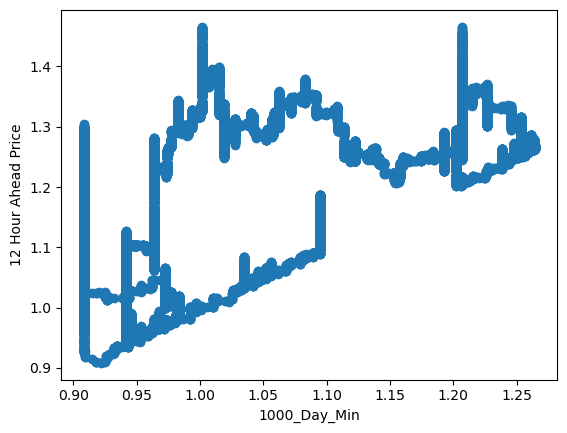

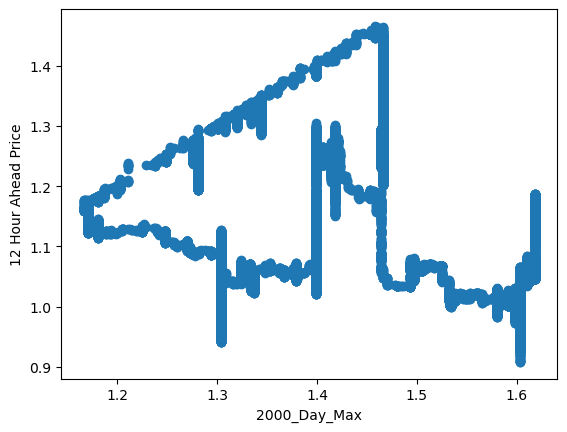

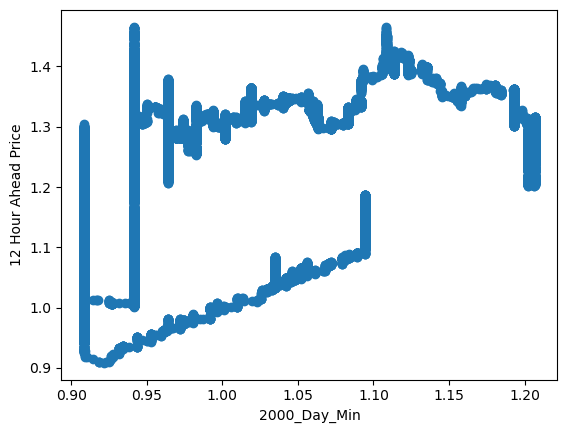

In [11]:
for col in X_train.columns:
    plt.scatter(X_train[col], y_train)
    plt.xlabel(col)
    plt.ylabel('12 Hour Ahead Price')
    plt.show()

## Linear Regression Modeling

### The first model this report will attempt is a regression model. This is the most obvious choice as the data this report is dealing with is continous.

In [12]:
X_withconstant = sm.add_constant(X_train)

C:\Users\jamie\anaconda3\envs\deeplearning\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


### As shown, there are many features which have high p values, making them ineffective to use in the model. However, there are also many seemingly healthy columns to use. These columns will be filtered out during the PCA process.
 * it is also important to note the extreamly high R-squared score. This is most likely due to close target of 12 hours. In the future, this report will test out much farther targets.

In [13]:
# 1. Instantiate Model
reg = sm.OLS(y_train, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
reg_results = reg.fit() # assigns a coefficient to each feature based on the ssr optimization

# Looking at the summary
reg_results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         12_Hours_Ahead   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.060e+06
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:26:01   Log-Likelihood:             4.4916e+05
No. Observations:              108827   AIC:                        -8.983e+05
Df Residuals:                  108800   BIC:                        -8.980e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0011      0.000      5.889      0.000       0.001       0.001
Mean_Price       1.0013      0.009    108.042      0.000       0.983       1.019
6_Hour_Max       0.0140      0.011      1.225      0.220      -0.008       0.036
6_Hour_Min       0.0066      0.011      0.576      0.564      -0.016       0.029
12_Hour_Max     -0.0092      0.010     -0.937      0.349      -0.028       0.010
12_Hour_Min      0.0207      0.010      2.099      0.036       0.001       0.040
1_Day_Max       -0.0040      0.005     -0.720      0.471      -0.015       0.007
1_Day_Min       -0.0284      0.006     -5.142      0.000      -0.039      -0.018
7_Day_Max       -0.0086      0.002     -3.528      0.000      -0.013      -0.004
7_Day_Min       -0.0050      0.003     -1.907      0.057      -0.010       0.000
14_Day_Max       0.0079      0.002      3.731      0.000       0.004       0.012
14_Day_Min      -0.0026      0.002     -1.127      0.260      -0.007       0.002
30_Day_Max       0.0045      0.001      3.133      0.002       0.002       0.007
30_Day_Min       0.0027      0.001      1.956      0.050   -5.71e-06       0.005
90_Day_Max      -0.0006      0.001     -0.665      0.506      -0.002       0.001
90_Day_Min       0.0011      0.001      1.343      0.179      -0.001       0.003
180_Day_Max     -0.0010      0.001     -1.707      0.088      -0.002       0.000
180_Day_Min     -0.0007      0.001     -0.838      0.402      -0.002       0.001
360_Day_Max     -0.0015      0.001     -2.865      0.004      -0.002      -0.000
360_Day_Min      0.0029      0.001      3.038      0.002       0.001       0.005
500_Day_Max      0.0029      0.001      5.262      0.000       0.002       0.004
500_Day_Min     -0.0025      0.001     -3.017      0.003      -0.004      -0.001
700_Day_Max     -0.0006      0.000     -2.968      0.003      -0.001      -0.000
700_Day_Min     -0.0006      0.000     -2.968      0.003      -0.001      -0.000
1000_Day_Max    -0.0008      0.000     -2.587      0.010      -0.001      -0.000
1000_Day_Min     0.0017      0.000      4.494      0.000       0.001       0.003
2000_Day_Max    -0.0002      0.000     -1.104      0.270      -0.000       0.000
2000_Day_Min    -0.0009      0.000     -3.544      0.000      -0.001      -0.000
==============================================================================
Omnibus:                    19573.938   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           511210.031
Skew:                          -0.052   Prob(JB):                         0.00
Kurtosis:                      13.617   Cond. No.                     1.02e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [14]:
model_resids = reg_results.resid # this is where the residuals are stored

model_fittedvals = reg_results.fittedvalues # this is where the fitted values are stored

### This histogram depicts the normality of the residual distribution for the linear regression model. Seemingly a reliable linear model, as this is what most residual distributions look like for accurate regression models.

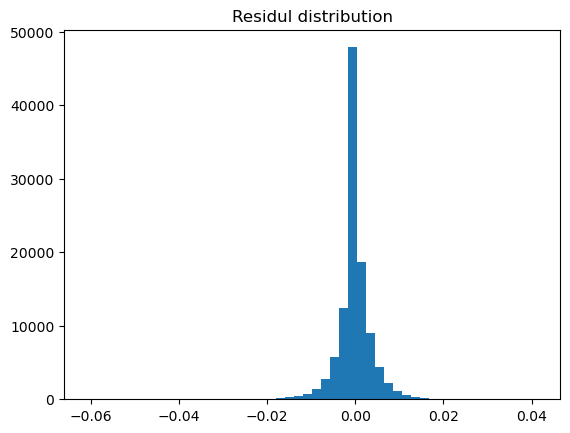

In [15]:
plt.figure()
plt.hist(model_resids, bins = 50)
plt.title('Residul distribution')
plt.show()

## Feature reduction using PCA

### This report will attempt to increase the efficiency of it's models by running PCA in order to reduce features,

In [16]:
# Instantiate and fit
my_PCA_cumulative = PCA()
my_PCA_cumulative.fit(X_train)

# Transform train and test
X_train_PCA = my_PCA_cumulative.transform(X_train)
X_validate_PCA = my_PCA_cumulative.transform(X_validate)

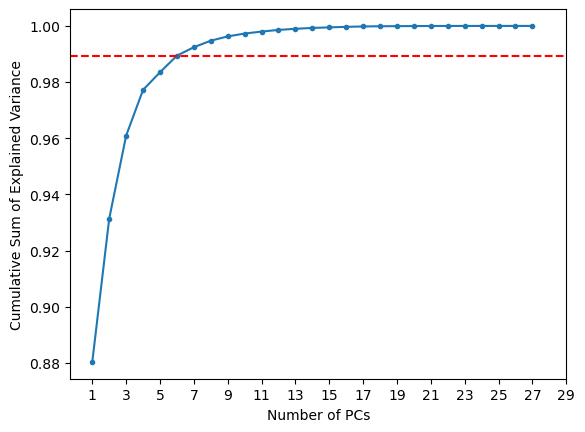

In [17]:
# Pull out the explained variance ratio
expl_var = my_PCA_cumulative.explained_variance_ratio_

# Calculate the cumulative sum of this array using the 
cumulative_sum = np.cumsum(expl_var)
# Plot out the cumulative sum graph

plt.figure()
plt.plot(range(1,28), cumulative_sum, marker='.')
plt.axhline(0.9892, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.xticks(range(1,31,2))
plt.show()

### Optimal number of componants seem to be around 6, as this is where the explained varience sum starts to plateu.

In [18]:
# Instantiate and fit
my_PCA = PCA(n_components = 6)
my_PCA.fit(X_train)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train)
X_validate_PCA = my_PCA.transform(X_validate)
X_test_PCA = my_PCA.transform(X_test)

### When running another linear regresion on the new transformed data using PCA, the R-Squared valued lowers. In this case, the author is glad to see this, as it is a sign the model is becoming more realistic.
 + furthermore, it is important to note all the p values are < 0.1, making this an extreamly efficient and effective dataset.

In [19]:
X_withconstant_PCA = sm.add_constant(X_train_PCA)
# 1. Instantiate Model
reg = sm.OLS(y_train, X_withconstant_PCA)

# 2. Fit Model (this returns a seperate object with the parameters)
reg_results = reg.fit() # assigns a coefficient to each feature based on the ssr optimization

# Looking at the summary
reg_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         12_Hours_Ahead   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 6.634e+06
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:26:05   Log-Likelihood:             3.8420e+05
No. Observations:              108827   AIC:                        -7.684e+05
Df Residuals:                  108820   BIC:                        -7.683e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1691   2.15e-05   5.44e+04      0.000       1.169       1.169
x1             0.2060   3.32e-05   6210.198      0.000       0.206       0.206
x2            -0.1430      0.000  -1038.035      0.000      -0.143      -0.143
x3            -0.0124      0.000    -68.532      0.000      -0.013      -0.012
x4             0.0685      0.000    281.221      0.000       0.068       0.069
x5            -0.0980      0.000   -249.144      0.000      -0.099      -0.097
x6             0.0469      0.000    116.054      0.000       0.046       0.048
==============================================================================
Omnibus:                     8868.505   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54624.641
Skew:                           0.074   Prob(JB):                         0.00
Kurtosis:                       6.468   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Neural Network Modeling

### Using the keras.Sequential() library, this report will attempt to build a neural network outputting the price of the USD/CAD foreign exchange pair 12 hours ahead.
 + This model has 5 layers
 + 1 input layer
 + 3 hidden layers
 + 1 output layer (with one node, predicting the price o the exchange rate 12 hours ahead)

In [20]:
# Create a new sequential model
model = Sequential()

model.add(layers.Dense(17, activation="relu"))

# Declare the hidden layers
model.add(layers.Dense(30, activation="relu"))
model.add(layers.Dense(60, activation="relu"))
model.add(layers.Dense(80, activation="relu"))

# Declare the output layer
model.add(layers.Dense(1)) # For regression, we don't specify any activation function.

# Compile the model
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(),  
    # Loss function to minimize
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError()]
)

### Using an initial epoch value of 40.

In [21]:
EPOCHS = 40
history = model.fit(X_train_PCA, y_train, batch_size=100, epochs=EPOCHS, verbose=1, validation_data=(X_validate_PCA, y_validate))

Epoch 1/40
1089/1089 [==============================] - 5s 4ms/step - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 6.0743e-05 - val_mean_squared_error: 6.0743e-05
Epoch 2/40
1089/1089 [==============================] - 5s 5ms/step - loss: 5.0347e-05 - mean_squared_error: 5.0347e-05 - val_loss: 3.9887e-05 - val_mean_squared_error: 3.9887e-05
Epoch 3/40
1089/1089 [==============================] - 6s 5ms/step - loss: 4.2693e-05 - mean_squared_error: 4.2693e-05 - val_loss: 3.9552e-05 - val_mean_squared_error: 3.9552e-05
Epoch 4/40
1089/1089 [==============================] - 5s 4ms/step - loss: 4.0623e-05 - mean_squared_error: 4.0623e-05 - val_loss: 3.4668e-05 - val_mean_squared_error: 3.4668e-05
Epoch 5/40
1089/1089 [==============================] - 3s 3ms/step - loss: 4.0781e-05 - mean_squared_error: 4.0781e-05 - val_loss: 4.3046e-05 - val_mean_squared_error: 4.3046e-05
Epoch 6/40
1089/1089 [==============================] - 3s 3ms/step - loss: 4.2105e-05 - mean_squared_error:

In [22]:
# Evaluate the model using the test data and generate predictions
train_loss = history.history["loss"][-1]
result = model.evaluate(X_validate_PCA, y_validate, verbose=1)

y_pred = model.predict(X_validate_PCA)

171/171 [==============================] - 0s 2ms/step - loss: 2.7800e-05 - mean_squared_error: 2.7800e-05


### The below plot describes the Mean Squared Error of each iteration. This report will optimize this value using a Reccurent Neural Network.

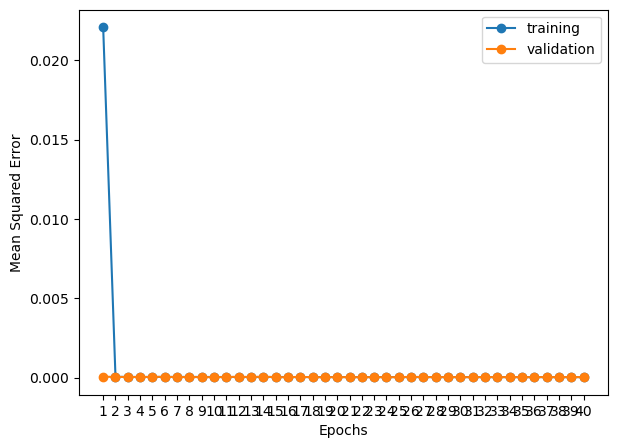

In [23]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history["mean_squared_error"], label="training", marker="o")
plt.plot(epochs, history.history["val_mean_squared_error"], label="validation", marker="o")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Mean Squared Error")
plt.legend()

In [24]:
from sklearn.metrics import r2_score

r2_score(y_validate, y_pred)

0.9985202695084505

## Reccurent Neural Network Modeling

### In order to reduce underfitting, often data scientists increase the complexity of their model. In this case, by adding LSTM layers to the model, it allows the network to learn recurently. This report will use this technique in order to increase the effectiveness of the model.

In [25]:
X_train_PCA.shape

(108827, 6)

In [26]:
RNN = Sequential()

RNN.add(LSTM(32, activation='relu', return_sequences=False, input_shape=(1, 6)))
RNN.add(BatchNormalization())


RNN.add(Dense(64, activation='relu'))
RNN.add(BatchNormalization())
RNN.add(Dropout(0.2))

RNN.add(Dense(10, activation='relu'))
RNN.add(BatchNormalization())

RNN.add(Dense(1))
RNN.build()

In [27]:
# Compile model
RNN.compile(
    loss='mean_squared_error',
    optimizer=Adam(lr=0.001),
    metrics=[keras.metrics.MeanSquaredError()]
)

### The neural network is made up of 4 layers:
 + one input layer, taking an input size of 6, outputting 32 nodes
 + two hidden layers
 + one output layer, with one node --> predicting the price 6 hours ahead

In [28]:
# Display its summary
RNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4992      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)               

In [29]:
X_train_PCA

array([[-0.78177605,  0.19922353,  0.13534518,  0.1872257 ,  0.02590738,
        -0.01379476],
       [ 0.24169579, -0.29562118,  0.0798069 , -0.00629677, -0.03597754,
         0.07456814],
       [-0.10347249, -0.02071151,  0.21967183,  0.0118955 ,  0.11181953,
         0.00227387],
       ...,
       [-0.44427505,  0.18780378, -0.07521727,  0.15818654,  0.07472891,
        -0.02284424],
       [-0.36177172, -0.24763174, -0.08300929, -0.07865195,  0.01595275,
         0.02273897],
       [-0.73344945,  0.1664339 ,  0.11579683,  0.1881224 ,  0.00961443,
        -0.02375404]])

In [30]:
inputX = np.reshape(X_train_PCA,(108827,1, 6 ))
valX = np.reshape(X_validate_PCA,(5442,1, 6 ))

In [31]:
X_validate_PCA.shape

(5442, 6)

In [32]:
X_train_PCA.shape

(108827, 6)

In [33]:
EPOCHS = 15
history = RNN.fit(inputX, y_train,
        batch_size=100,
        epochs=EPOCHS,
        validation_data=(valX, y_validate))

Epoch 1/15
1089/1089 [==============================] - 8s 7ms/step - loss: 0.1613 - mean_squared_error: 0.1613 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 2/15
1089/1089 [==============================] - 7s 7ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 2.8089e-04 - val_mean_squared_error: 2.8089e-04
Epoch 3/15
1089/1089 [==============================] - 8s 7ms/step - loss: 9.7862e-04 - mean_squared_error: 9.7862e-04 - val_loss: 1.2637e-04 - val_mean_squared_error: 1.2637e-04
Epoch 4/15
1089/1089 [==============================] - 6s 6ms/step - loss: 6.1263e-04 - mean_squared_error: 6.1263e-04 - val_loss: 9.7306e-05 - val_mean_squared_error: 9.7306e-05
Epoch 5/15
1089/1089 [==============================] - 7s 6ms/step - loss: 5.1007e-04 - mean_squared_error: 5.1007e-04 - val_loss: 5.3696e-05 - val_mean_squared_error: 5.3696e-05
Epoch 6/15
1089/1089 [==============================] - 7s 7ms/step - loss: 4.6111e-04 - mean_squared_error: 4.6111e-04 - va

### The visualization below depics the Mean Squared Error of each epoch, in order to optimize the number of times to train the neural network. It seems like the validation error rises around epoch 20 (this is very miniscule, however since foreign exchange deals with miniscule price movement, that difference is important). This report will use 20 epochs, with a batch size of 300 to train this neural network.
 * As shown above, the neural network is made up of 4 layers.
     + one input layer, taking an input size of 6, outputting 32 nodes
     + two hidden layers
     + one output layer, with one node --> predicting the price 6 hours ahead

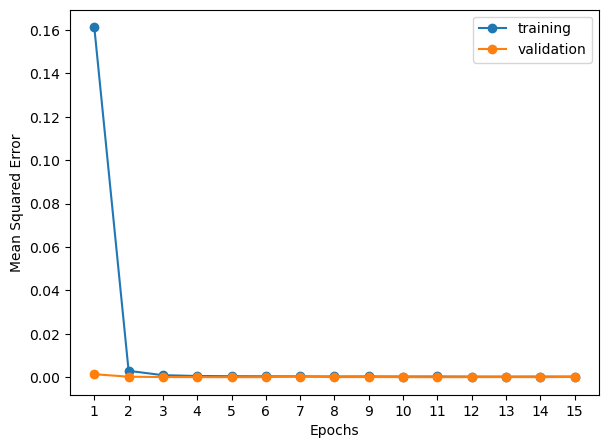

In [34]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history["mean_squared_error"], label="training", marker="o")
plt.plot(epochs, history.history["val_mean_squared_error"], label="validation", marker="o")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Mean Squared Error")
plt.legend()



### Finally the neural network is tested against the untouched test data, and its predictions are graphed against the true values. There is not much varitation as to the error of the predictions, and the `r squared` score is 99.1%, therefore this author considers this model a success in predicting the price of forign exchange rates 12 hours ahead.

In [35]:
X_test_RNN = np.reshape(X_test_PCA,(21765,1, 6 ))

Text(0, 0.5, 'Predicted Values')

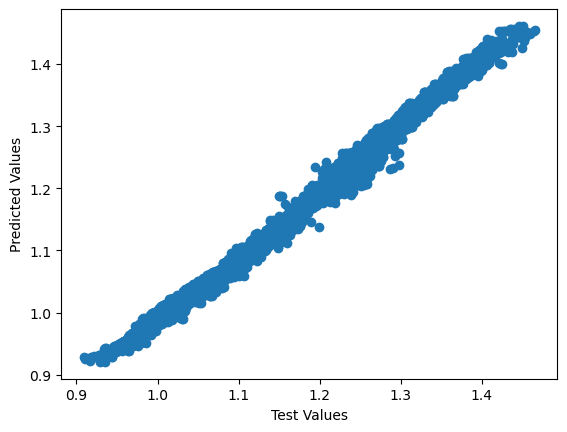

In [36]:
testPredictions = RNN.predict(X_test_RNN)
plt.scatter(y_test, testPredictions)
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')

In [37]:
r2_score(y_test, testPredictions)

0.9907226844544543